<a href="https://colab.research.google.com/github/mgnarag/autoencoder-cleaning/blob/main/model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!ls drive/My\ Drive
file_path = "/content/drive/My Drive/Architectural_designs/one quadrant/"

In [ ]:

import time
import pandas as pd  


import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


from PIL import Image, ImageOps
import os
import numpy as np

epoch = 100
model = 2
size = 32
 
def crop(im):
    width, height = im.size
    data = []
#    for j in range(0,int(height/28)):          #NON OVERLAPPING
#        for i in range(0,int(width/28)):
    for j in np.arange(0,int(height/size)+1,2): 
        for i in np.arange(0,int(width/size)+1,2):
            im1 = im.crop((0 + (size*i), 0 + (size*j), size + (size*i), size + (size*j)))
            im1 = np.array(im1)
            im1 = im1.astype(np.float32)
            im1 = im1/255
            data.append(im1)
    return data




train_input = np.array(crop(ImageOps.grayscale(Image.open(file_path + "final_input_train.png"))))
print("Done reading the  training input of size = ", train_input.shape)

train_output = np.array(crop(ImageOps.grayscale(Image.open(file_path + "cleaned_output_train.png")))) 
print("Done reading the  training out of size = ", train_output.shape)

test_input = np.array(crop(ImageOps.grayscale(Image.open(file_path + "final_input_test.png"))))
print("Done reading the  test input of size = ", test_input.shape)

test_output = np.array(crop(ImageOps.grayscale(Image.open(file_path + "cleaned_output_test.png"))))
print("Done reading the  test output of size = ", test_output.shape)



Done reading the  training input of size =  (12650, 32, 32)
Done reading the  training out of size =  (12650, 32, 32)
Done reading the  test input of size =  (5290, 32, 32)
Done reading the  test output of size =  (5290, 32, 32)


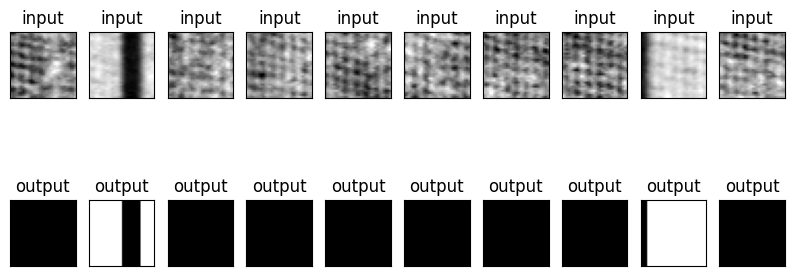

In [ ]:

n = 10
plt.figure(figsize=(10, 4))
for i in range(0,10):

    ax = plt.subplot(2, n, i + 1)
    plt.title("input")
    plt.imshow((train_input[i+10]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    bx = plt.subplot(2, n, i + n + 1)
    plt.title("output")
    plt.imshow((train_output[i+10]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()



In [ ]:
start = time.time()
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class autoenc(Model):
  def __init__(self):
    super(autoenc, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(size, size, 1)),
      layers.Conv2D(64, (3, 3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(64, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = autoenc()


autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

model = autoencoder.fit(train_input, train_output,
                epochs=epoch,
                shuffle=True,
                validation_data=(test_input, test_output))

autoencoder.encoder.summary()



autoencoder.save(file_path + '1 Models/' + 'autoencoder_1')

loss = model.history['loss']
loss = pd.DataFrame(loss) 
loss.to_csv(file_path + '2 Loss/'+'loss_1.csv') 
val_loss = model.history['val_loss']
val_loss = pd.DataFrame(val_loss) 
val_loss.to_csv(file_path + '3 Validation loss/' +'val_loss_1.csv') 

# record end time
end = time.time()
 
print("The time of execution of above program is :",
      (end-start), "seconds")


Epoch 1/100
396/396 [==============================] - 13s 7ms/step - loss: 0.0395 - val_loss: 0.0117
Epoch 2/100
396/396 [==============================] - 2s 6ms/step - loss: 0.0134 - val_loss: 0.0125
Epoch 3/100
396/396 [==============================] - 2s 5ms/step - loss: 0.0125 - val_loss: 0.0063
Epoch 4/100
396/396 [==============================] - 2s 5ms/step - loss: 0.0113 - val_loss: 0.0103
Epoch 5/100
396/396 [==============================] - 2s 5ms/step - loss: 0.0103 - val_loss: 0.0062
Epoch 6/100
396/396 [==============================] - 2s 5ms/step - loss: 0.0098 - val_loss: 0.0066
Epoch 7/100
396/396 [==============================] - 2s 5ms/step - loss: 0.0094 - val_loss: 0.0086
Epoch 8/100
396/396 [==============================] - 3s 7ms/step - loss: 0.0092 - val_loss: 0.0098
Epoch 9/100
396/396 [==============================] - 2s 5ms/step - loss: 0.0092 - val_loss: 0.0068
Epoch 10/100
396/396 [==============================] - 2s 5ms/step - loss: 0.0089 - val_l

The time of execution of above program is : 272.5030837059021 seconds
